In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np


In [52]:
# Classification Neural Network
class ClassificationNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(ClassificationNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)  # No softmax here - CrossEntropyLoss includes it
        return x


In [53]:
# Generate classification dataset (2D circular patterns)
torch.manual_seed(42)
n_samples = 10
n_classes = 3


In [54]:
# Create 3 clusters
centers = torch.tensor([[2, 2], [-2, -2], [2, -2]], dtype=torch.float32)
X_class = []
y_class = []

for i in range(n_classes):
    # Generate points around each center
    cluster_size = n_samples // n_classes
    cluster_X = centers[i] + 0.8 * torch.randn(cluster_size, 2)
    cluster_y = torch.full((cluster_size,), i, dtype=torch.long)
    
    X_class.append(cluster_X)
    y_class.append(cluster_y)

X_class = torch.cat(X_class, dim=0)
y_class = torch.cat(y_class, dim=0)

print(f"Classification dataset - X: {X_class.shape}, y: {y_class.shape}")
print(f"Classes: {torch.unique(y_class)}")

Classification dataset - X: torch.Size([9, 2]), y: torch.Size([9])
Classes: tensor([0, 1, 2])


In [60]:
print(f'X_class: {X_class}')
print(f'y_class: {y_class}')

X_class: tensor([[ 2.2694,  2.1030],
        [ 2.1876,  2.1843],
        [ 1.1017,  1.8509],
        [-0.2334, -2.5104],
        [-1.6307, -1.7861],
        [-1.5721, -1.3525],
        [ 2.8882, -3.3518],
        [ 1.2088, -1.2336],
        [ 3.0577, -1.3462]])
y_class: tensor([0, 0, 0, 1, 1, 1, 2, 2, 2])


In [55]:
# Split data
train_size = int(0.8 * len(X_class))
X_train_class = X_class[:train_size]
y_train_class = y_class[:train_size]
X_test_class = X_class[train_size:]
y_test_class = y_class[train_size:]


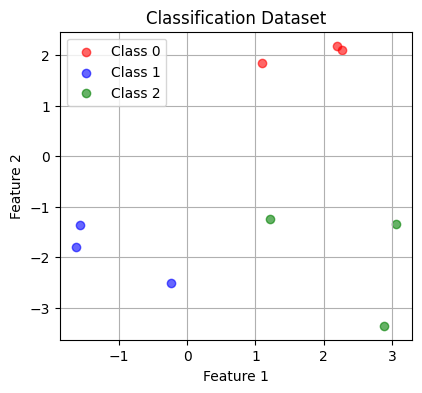

In [56]:
# Visualize the dataset
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
colors = ['red', 'blue', 'green']
for i in range(n_classes):
    mask = y_class == i
    plt.scatter(X_class[mask, 0], X_class[mask, 1], c=colors[i], label=f'Class {i}', alpha=0.6)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Classification Dataset')
plt.legend()
plt.grid(True)


In [61]:
# Train classification model
clf_model = ClassificationNet(input_size=2, hidden_size=32, num_classes=3)
clf_criterion = nn.CrossEntropyLoss()  # For multi-class classification
clf_optimizer = optim.Adam(clf_model.parameters(), lr=0.01)


In [63]:
epoch = 0

# Training
clf_model.train()
train_outputs = clf_model(X_train_class)
train_loss = clf_criterion(train_outputs, y_train_class)

print(f'inputs: {X_train_class}')
print(f'outputs: {train_outputs}')
print(f'train_loss: {train_loss.item()}')

inputs: tensor([[ 2.2694,  2.1030],
        [ 2.1876,  2.1843],
        [ 1.1017,  1.8509],
        [-0.2334, -2.5104],
        [-1.6307, -1.7861],
        [-1.5721, -1.3525],
        [ 2.8882, -3.3518]])
outputs: tensor([[-0.0323, -0.0016,  0.2237],
        [ 0.1825,  0.3353,  0.4668],
        [ 0.0189, -0.0646,  0.1631],
        [-0.0183, -0.1149,  0.4007],
        [ 0.1105, -0.0400,  0.2684],
        [ 0.1144, -0.0482,  0.2305],
        [ 0.1245, -0.2186,  0.1216]], grad_fn=<AddmmBackward0>)
train_loss: 1.2020434141159058


In [64]:

clf_optimizer.zero_grad()
train_loss.backward()
clf_optimizer.step()


In [71]:
clf_model.eval()

# Training accuracy
train_pred = torch.argmax(train_outputs, dim=1)
print(f'Training predictions: {train_pred}')
print(f'True labels: {y_train_class}')
train_accuracy = (train_pred == y_train_class).float().mean()
print(f'Training Accuracy: {train_accuracy.item() * 100:.2f}%')



Training predictions: tensor([2, 2, 2, 2, 2, 2, 0])
True labels: tensor([0, 0, 0, 1, 1, 1, 2])
Training Accuracy: 0.00%


In [ ]:


train_accuracies.append(train_acc.item())

# Test accuracy
test_outputs = clf_model(X_test_class)
test_pred = torch.argmax(test_outputs, dim=1)
test_acc = (test_pred == y_test_class).float().mean()
test_accuracies.append(test_acc.item())


In [21]:
class ImprovedNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, dropout_rate=0.2):
        super(ImprovedNet, self).__init__()
        
        # Define layers
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size)
        self.fc3 = nn.Linear(hidden_size, output_size)
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)
        
        # Batch normalization
        self.bn1 = nn.BatchNorm1d(hidden_size)
        self.bn2 = nn.BatchNorm1d(hidden_size)
        
    def forward(self, x):
        # First layer with batch norm and dropout
        x = self.fc1(x)
        x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        # Second layer with batch norm and dropout
        x = self.fc2(x)
        x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout(x)
        
        # Output layer (no activation for regression, or add softmax for classification)
        x = self.fc3(x)
        return x

# Create the network
model = ImprovedNet(input_size=10, hidden_size=64, output_size=1)
print(model)

# Count parameters
total_params = sum(p.numel() for p in model.parameters())
trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f"\nTotal parameters: {total_params}")
print(f"Trainable parameters: {trainable_params}")

# Test with sample data
sample_input = torch.randn(32, 10)  # Batch of 32 samples, 10 features each
output = model(sample_input)
print(f"\nInput shape: {sample_input.shape}")
print(f"Output shape: {output.shape}")

ImprovedNet(
  (fc1): Linear(in_features=10, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
  (bn1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

Total parameters: 5185
Trainable parameters: 5185

Input shape: torch.Size([32, 10])
Output shape: torch.Size([32, 1])


In [23]:
# Generate synthetic dataset for regression
torch.manual_seed(42)  # For reproducibility

# Create a non-linear function: y = sin(x1) + cos(x2) + 0.1*noise
n_samples = 1000
n_features = 2

X = torch.randn(n_samples, n_features)
y = torch.sin(X[:, 0]) + torch.cos(X[:, 1]) + 0.1 * torch.randn(n_samples)
y = y.unsqueeze(1)  # Make it a column vector

print(f"Dataset shapes - X: {X.shape}, y: {y.shape}")

# Split into train/test
train_size = int(0.8 * n_samples)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

print(f"Train set - X: {X_train.shape}, y: {y_train.shape}")
print(f"Test set - X: {X_test.shape}, y: {y_test.shape}")

# Create model, loss function, and optimizer
model = ImprovedNet(input_size=2, hidden_size=32, output_size=1, dropout_rate=0.1)
criterion = nn.MSELoss()  # Mean Squared Error for regression
optimizer = optim.Adam(model.parameters(), lr=0.01)

print(f"\nModel: {model}")
print(f"Loss function: {criterion}")
print(f"Optimizer: {optimizer}")


Dataset shapes - X: torch.Size([1000, 2]), y: torch.Size([1000, 1])
Train set - X: torch.Size([800, 2]), y: torch.Size([800, 1])
Test set - X: torch.Size([200, 2]), y: torch.Size([200, 1])

Model: ImprovedNet(
  (fc1): Linear(in_features=2, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.1, inplace=False)
  (bn1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (bn2): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)
Loss function: MSELoss()
Optimizer: Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    decoupled_weight_decay: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)


In [30]:

# Training loop
num_epochs = 300
train_losses = []
test_losses = []

print("\nStarting training...")

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set model to training mode
    
    # Forward pass
    train_pred = model(X_train)
    train_loss = criterion(train_pred, y_train)
    
    # Backward pass
    optimizer.zero_grad()  # Clear gradients
    train_loss.backward()  # Compute gradients
    optimizer.step()       # Update parameters
    
    # Evaluation phase
    model.eval()  # Set model to evaluation mode
    with torch.no_grad():  # Disable gradient computation for efficiency
        test_pred = model(X_test)
        test_loss = criterion(test_pred, y_test)
    
    # Store losses
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())
    
    # Print progress
    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}')

print("Training completed!")


Starting training...
Epoch [20/300], Train Loss: 0.0359, Test Loss: 0.0434
Epoch [40/300], Train Loss: 0.0345, Test Loss: 0.0413
Epoch [60/300], Train Loss: 0.0350, Test Loss: 0.0414
Epoch [80/300], Train Loss: 0.0347, Test Loss: 0.0345
Epoch [100/300], Train Loss: 0.0279, Test Loss: 0.0332
Epoch [120/300], Train Loss: 0.0271, Test Loss: 0.0312
Epoch [140/300], Train Loss: 0.0271, Test Loss: 0.0282
Epoch [160/300], Train Loss: 0.0248, Test Loss: 0.0250
Epoch [180/300], Train Loss: 0.0274, Test Loss: 0.0228
Epoch [200/300], Train Loss: 0.0279, Test Loss: 0.0225
Epoch [220/300], Train Loss: 0.0280, Test Loss: 0.0218
Epoch [240/300], Train Loss: 0.0286, Test Loss: 0.0211
Epoch [260/300], Train Loss: 0.0230, Test Loss: 0.0206
Epoch [280/300], Train Loss: 0.0225, Test Loss: 0.0235
Epoch [300/300], Train Loss: 0.0228, Test Loss: 0.0230
Training completed!


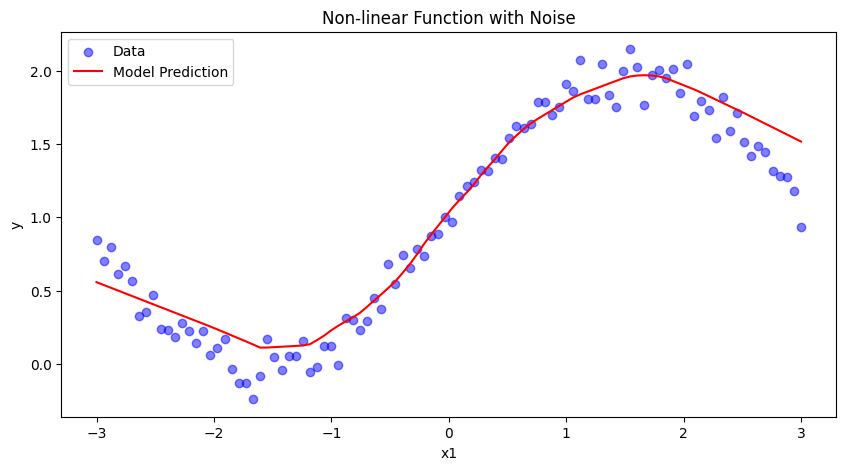

In [31]:
# Plot  a non-linear function: y = sin(x1) + cos(x2) + 0.1*noise

x1 = np.linspace(-3, 3, 100)
x2 = 0
y = np.sin(x1) + np.cos(x2) + 0.1 * np.random.randn(100)
y_pred = model(torch.tensor(np.column_stack((x1, np.full_like(x1, x2))), dtype=torch.float32)).detach().numpy()
plt.figure(figsize=(10, 5))
plt.scatter(x1, y, label='Data', color='blue', alpha=0.5)
plt.plot(x1, y_pred, label='Model Prediction', color='red')

plt.title('Non-linear Function with Noise')
plt.xlabel('x1')
plt.ylabel('y')
plt.legend()
plt.show()

In [2]:
torch1 = torch.zeros(2, 3)
print(f'torch1: {torch1}')

torch1: tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [3]:
t1= torch.tensor([1,2,3])
print(f't1: {t1}')

t1: tensor([1, 2, 3])


In [4]:
t2 = torch.tensor(2)
print(f't2: {t2}')

t2: 2


In [5]:
t3 = torch.tensor([2])
print(f't3: {t3}')

t3: tensor([2])


In [6]:

# Create a tensor with gradient tracking
x = torch.tensor(2.0, requires_grad=True)
print(f"x = {x}")

# Define a function y = x^2 + 3x + 1
y = x**2 + 3*x + 1
print(f"y = x^2 + 3x + 1 = {y}")


x = 2.0
y = x^2 + 3x + 1 = 11.0


In [7]:
type(x)

torch.Tensor

In [8]:
type(y)

torch.Tensor

In [9]:
x.shape
y.shape

torch.Size([])

In [10]:
y.backward()
print(f"dy/dx at x=2: {x.grad}")  # Should print

dy/dx at x=2: 7.0


In [11]:
x_vec = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y_vec = torch.sum(x_vec**2)

In [12]:
print(f"x_vec: {x_vec}")
print(f"y_vec: {y_vec}")

x_vec: tensor([1., 2., 3.], requires_grad=True)
y_vec: 14.0


In [13]:
y_vec.backward()
print(f"dy/dx at x_vec: {x_vec.grad}")  # Should print tensor([2.0, 4.0, 6.0])

dy/dx at x_vec: tensor([2., 4., 6.])


In [14]:
x = torch.linspace(-5, 5, 3, requires_grad=True)
print(f"x: {x}")

x: tensor([-5.,  0.,  5.], requires_grad=True)


In [15]:
linear_layer = nn.Linear(3, 2)

print(f"Linear layer: {linear_layer}")
print(f"Weight: {linear_layer.weight}")  # [output_size, input_size]
print(f"Bias: {linear_layer.bias}")      # [output_size]


Linear layer: Linear(in_features=3, out_features=2, bias=True)
Weight: Parameter containing:
tensor([[-0.1671,  0.2796, -0.4798],
        [ 0.1619, -0.3819, -0.5399]], requires_grad=True)
Bias: Parameter containing:
tensor([-0.3221, -0.2793], requires_grad=True)


In [16]:
# Sample input: batch_size=4, input_features=3
sample_input = torch.randn(4, 3)
print(f"\nInput shape: {sample_input.shape}")



Input shape: torch.Size([4, 3])


In [17]:
sample_input

tensor([[ 0.4976,  0.3475, -0.3738],
        [ 0.8813, -0.6790,  0.9571],
        [ 1.0242, -1.6082,  1.1487],
        [ 0.5238, -0.1320, -0.0873]])

In [18]:
# Forward pass
output = linear_layer(sample_input)
print(f"Output shape: {output.shape}")
print(f"Output:\n{output}")


Output shape: torch.Size([4, 2])
Output:
tensor([[-0.1287, -0.1297],
        [-1.1185, -0.3940],
        [-1.4941, -0.1195],
        [-0.4047, -0.0970]], grad_fn=<AddmmBackward0>)


In [19]:

# The linear transformation is: output = input @ weight.T + bias
print(f"\nManual calculation (should match):")
manual_output = sample_input @ linear_layer.weight.T + linear_layer.bias
print(f"Manual output:\n{manual_output}")
print(f"Difference: {torch.max(torch.abs(output - manual_output))}")  # Should be very small


Manual calculation (should match):
Manual output:
tensor([[-0.1287, -0.1297],
        [-1.1185, -0.3940],
        [-1.4941, -0.1195],
        [-0.4047, -0.0970]], grad_fn=<AddBackward0>)
Difference: 0.0
